In [34]:
# convert mp3 files into wav format
# 7 classes
# guitar: 106;  flute: 884; violin: 1502; clarinet: 846; trumpet: 485; cello: 889; saxophone: 732;
import os
import shutil
from pydub import AudioSegment

path = "/Users/Kaede/Desktop/final_project/all-samples/flute/"

#Change working directory
os.chdir(path)

audio_files = os.listdir()

for file in audio_files:
    #spliting the file into the name and the extension
    name, ext = os.path.splitext(file)
    if ext == ".mp3":
        try:
            mp3_sound = AudioSegment.from_mp3(file)
            mp3_sound = mp3_sound.set_frame_rate(16000) #change frame_length to 512
            mp3_sound.export("/Users/Kaede/Desktop/final_project/wav_files/flute/{0}.wav".format(name), format="wav")
        except:
            continue

In [1]:
# import packages
import os
import numpy as np
from scipy.io.wavfile import read
from sklearn.mixture import GaussianMixture
import python_speech_features as mfcc
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

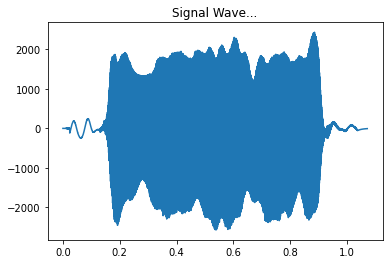

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
source = "/Users/Kaede/Desktop/final_project/wav_files/flute//"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]

spf = wave.open(files[0], "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "int16")
fs = spf.getframerate()

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()

In [2]:
# use mfcc to extract infomation in a wav file
def get_MFCC(sr, audio):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy=False)
    features = preprocessing.scale(features)
    return features

In [23]:
# read files from guitar
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"

os.chdir(source)
audio_files = os.listdir()

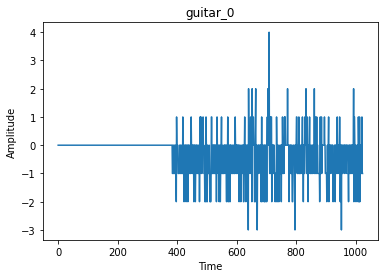

In [19]:
# picture of one wav file
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read(audio_files[0])
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("guitar_0")
# display the plot
plt.show()

In [66]:
# extract info from one wav file and see the shape
features = np.asarray(())
vector = get_MFCC(sr, audio)
if features.size == 0:
    features = vector
else:
    features = np.vstack((features, vector))
print(features.shape)

(237, 7)


In [46]:
# samples are divided into train(0.7) and test(0.3)
train_num = 0.7
# guitar: 106;  flute: 884; violin: 1502; clarinet: 846; trumpet: 485; cello: 889; saxophone: 732;

print('guitar: ',int(106*train_num))
print('flute: ', int(884*train_num))
print('violin: ', int(1502*train_num))
print('clarinet: ', int(846*train_num))
print('trumpet: ', int(485*train_num))
print('cello: ', int(889*train_num))
print('saxophone: ', int(732*train_num))

guitar:  74
flute:  618
violin:  1051
clarinet:  592
trumpet:  339
cello:  622
saxophone:  512


In [3]:
# extract info from wav files in guitar
source = "/Users/Kaede/Desktop/final_project/wav_files/guitar/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
guitar_features = np.asarray(())
for f in files[0:74]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if guitar_features.size == 0:
        guitar_features = vector
    else:
        guitar_features = np.vstack((guitar_features, vector))
print(guitar_features.shape)

(38439, 13)


In [4]:
# extract info from wav files in violin
source = "/Users/Kaede/Desktop/final_project/wav_files/violin/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
violin_features = np.asarray(())
for f in files[0:1051]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if violin_features.size == 0:
        violin_features = vector
    else:
        violin_features = np.vstack((violin_features, vector))
print(violin_features.shape)

(138415, 13)


In [5]:
# extract info from wav files in clarinet
source = "/Users/Kaede/Desktop/final_project/wav_files/clarinet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
clarinet_features = np.asarray(())
for f in files[:592]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if clarinet_features.size == 0:
        clarinet_features = vector
    else:
        clarinet_features = np.vstack((clarinet_features, vector))
print(clarinet_features.shape)

(135699, 13)


In [6]:
# extract info from wav files in flute
source = "/Users/Kaede/Desktop/final_project/wav_files/flute/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
flute_features = np.asarray(())
for f in files[:618]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if flute_features.size == 0:
        flute_features = vector
    else:
        flute_features = np.vstack((flute_features, vector))
print(flute_features.shape)

(129233, 13)


In [7]:
# extract info from wav files in saxophone
source = "/Users/Kaede/Desktop/final_project/wav_files/saxophone/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
saxophone_features = np.asarray(())
for f in files[:512]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if saxophone_features.size == 0:
        saxophone_features = vector
    else:
        saxophone_features = np.vstack((saxophone_features, vector))
print(saxophone_features.shape)

(96328, 13)


In [8]:
# extract info from wav files in cello
source = "/Users/Kaede/Desktop/final_project/wav_files/cello/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
cello_features = np.asarray(())
for f in files[:622]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if cello_features.size == 0:
        cello_features = vector
    else:
        cello_features = np.vstack((cello_features, vector))
print(cello_features.shape)

(110218, 13)


In [9]:
# extract info from wav files in trumpet
source = "/Users/Kaede/Desktop/final_project/wav_files/trumpet/"
files = [os.path.join(source, f) for f in os.listdir(source) if f.endswith('.wav')]
trumpet_features = np.asarray(())
for f in files[:339]:
    sr, audio = read(f)
    vector = get_MFCC(sr, audio)
    if trumpet_features.size == 0:
        trumpet_features = vector
    else:
        trumpet_features = np.vstack((trumpet_features, vector))
print(trumpet_features.shape)

(94133, 13)


In [10]:
# save features extracting by mfcc into npy files (for training)
with open('/Users/Kaede/Desktop/final_project/guitar.npy', 'wb') as f:
    np.save(f, guitar_features)
with open('/Users/Kaede/Desktop/final_project/violin.npy', 'wb') as f:
    np.save(f, violin_features)
with open('/Users/Kaede/Desktop/final_project/flute.npy', 'wb') as f:
    np.save(f, flute_features)
with open('/Users/Kaede/Desktop/final_project/trumpet.npy', 'wb') as f:
    np.save(f, trumpet_features)
with open('/Users/Kaede/Desktop/final_project/clarinet.npy', 'wb') as f:
    np.save(f, clarinet_features)
with open('/Users/Kaede/Desktop/final_project/cello.npy', 'wb') as f:
    np.save(f, cello_features)
with open('/Users/Kaede/Desktop/final_project/saxophone.npy', 'wb') as f:
    np.save(f, saxophone_features)